# Atividade 2 - Prado

Gustavo Coelho - GU3054829

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [274]:
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle"
)
plt.rcParams["font.sans-serif"] = ["Century Gothic", "sans-serif"]
plt.rcParams["axes.titlepad"] = 20
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 18

## Etapa 1 – Leitura e análise inicial
Objetivo: Entender o que os dados representam
1. Carregue o arquivo CSV e exiba as 5 primeiras linhas.
2. Liste os produtos únicos e os dias da semana presentes no dataset.

In [297]:
df = pd.read_csv("./02. vendas_cafeteria.csv")

df

,dia,produto,vendas,quantidade
0,Sexta,Café Expresso,126.0,14
1,Quarta,Cappuccino,216.0,18
2,Domingo,Latte,264.0,24
3,Sábado,Pão de Queijo,76.0,19
4,Quinta,Croissant,169.0,26
...,...,...,...,...
95,Domingo,Croissant,149.5,23
96,Sexta,Croissant,97.5,15
97,Segunda,Croissant,97.5,15
98,Terça,Croissant,71.5,11


In [276]:
df["produto"].unique()

array(['Café Expresso', 'Cappuccino', 'Latte', 'Pão de Queijo',
       'Croissant'], dtype=object)

In [277]:
df["dia_abreviado"] = df["dia"].apply(lambda x: x[:3] + ".")


# Etapa 2 – Análise gráfica diária
Objetivo: Avaliar o desempenho por dia da semana
1. Use .groupby('dia')['vendas'].sum() para encontrar os dias com mais vendas.
2. Crie um gráfico de barras com matplotlib para representar o total de vendas por dia.
3. Use cores e rótulos apropriados para facilitar a leitura.




In [278]:
vendas_por_dia = df.groupby("dia_abreviado")["vendas"].sum().reset_index()

vendas_por_dia

,dia_abreviado,vendas
0,Dom.,2617.0
1,Qua.,3506.0
2,Qui.,2347.0
3,Seg.,2062.5
4,Sex.,2415.0
5,Sáb.,1841.0
6,Ter.,1589.5


In [279]:
def gera_escala_de_cores(arr, cor="azul"):
    norm = plt.Normalize(arr.min(), arr.max())
    mapas = {
        "azul": plt.cm.Blues,
        "vermelho": plt.cm.Reds,
        "verde": plt.cm.Greens,
        "cinza": plt.cm.Greys,
    }
    if cor not in mapas:
        raise ValueError("Cor inválida. Use 'azul', 'vermelho', 'verde' ou 'cinza'.")
    return mapas[cor](norm(arr))


In [280]:
# Ordenar os dias da semana de acordo com a ordem desejada
ordem_dias_semana = [
    "Seg.",
    "Ter.",
    "Qua.",
    "Qui.",
    "Sex.",
    "Sáb.",
    "Dom.",
]

In [281]:
vendas_por_dia = vendas_por_dia.set_index("dia_abreviado")
vendas_por_dia = vendas_por_dia.reindex(ordem_dias_semana)


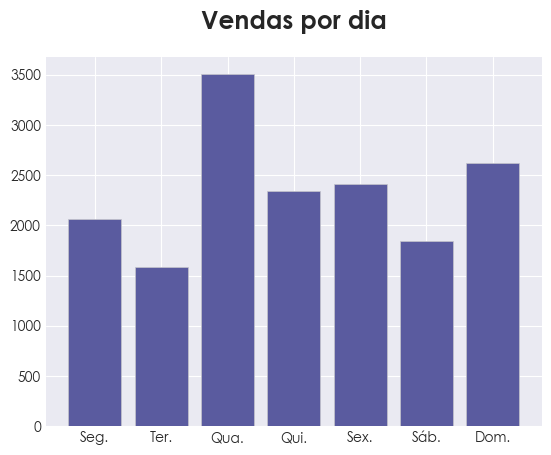

In [282]:
plt.bar(
    vendas_por_dia.index,
    vendas_por_dia["vendas"],
    edgecolor="#c5c5cb",
)
plt.title("Vendas por dia")
plt.show()

# Etapa 3 – Comparação entre produtos
Objetivo: Explorar o desempenho dos produtos
1. Agrupe por produto e gere um gráfico de pizza com participação nas vendas totais.
2. Em seguida, agrupe por dia, por produto e use um gráfico de barras empilhadas.


In [283]:
vendas_por_produto = df.groupby("produto")["vendas"].sum().reset_index().sort_values("vendas", ascending=False)

vendas_por_produto

,produto,vendas
3,Latte,4587.0
1,Cappuccino,4104.0
0,Café Expresso,3528.0
2,Croissant,3315.0
4,Pão de Queijo,844.0


Text(0.5, 1.0, 'Vendas por produto')

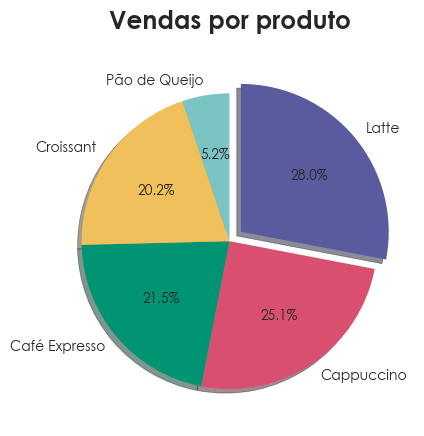

In [284]:
explode = [
    0.1 if i == vendas_por_produto["vendas"].idxmax() else 0
    for i in vendas_por_produto.index
]

plt.pie(
    vendas_por_produto["vendas"],
    labels=vendas_por_produto["produto"], # type: ignore
    autopct="%1.1f%%",
    explode=explode,
    startangle=90,
    counterclock=False,
    shadow=True,
)
plt.title("Vendas por produto")


In [285]:
vendas_produto_por_dia = df.groupby(["dia_abreviado", "produto"])["vendas"]
vendas_produto_por_dia = vendas_produto_por_dia.sum().unstack().fillna(0)

vendas_produto_por_dia

produto,Café Expresso,Cappuccino,Croissant,Latte,Pão de Queijo
dia_abreviado,,,,,
Dom.,828.0,480.0,429.0,880.0,0.0
Qua.,189.0,1644.0,533.0,836.0,304.0
Qui.,747.0,228.0,442.0,814.0,116.0
Seg.,261.0,1008.0,201.5,440.0,152.0
Sex.,711.0,240.0,507.0,957.0,0.0
Sáb.,585.0,252.0,364.0,440.0,200.0
Ter.,207.0,252.0,838.5,220.0,72.0


In [286]:
vendas_produto_por_dia = vendas_produto_por_dia.reindex(ordem_dias_semana)

vendas_produto_por_dia

produto,Café Expresso,Cappuccino,Croissant,Latte,Pão de Queijo
dia_abreviado,,,,,
Seg.,261.0,1008.0,201.5,440.0,152.0
Ter.,207.0,252.0,838.5,220.0,72.0
Qua.,189.0,1644.0,533.0,836.0,304.0
Qui.,747.0,228.0,442.0,814.0,116.0
Sex.,711.0,240.0,507.0,957.0,0.0
Sáb.,585.0,252.0,364.0,440.0,200.0
Dom.,828.0,480.0,429.0,880.0,0.0


In [ ]:
def adiciona_valores_ao_grafico_barras_empilhadas(ax, tabela):
    # Adicionar valores centralizados
    for i, (_idx, row) in enumerate(tabela.iterrows()):
        cumulativo = 0
        for produto in tabela.columns:
            valor = row[produto]
            if valor > 0:
                # Posição x da barra, y acumulado até aqui + metade da altura do segmento
                x = i
                y = cumulativo + valor / 2
                ax.text(
                    x,
                    y,
                    f"{int(valor)}",
                    ha="center",
                    va="center",
                    color="white",
                    fontsize=8,
                    fontweight="bold",
                )
            cumulativo += valor


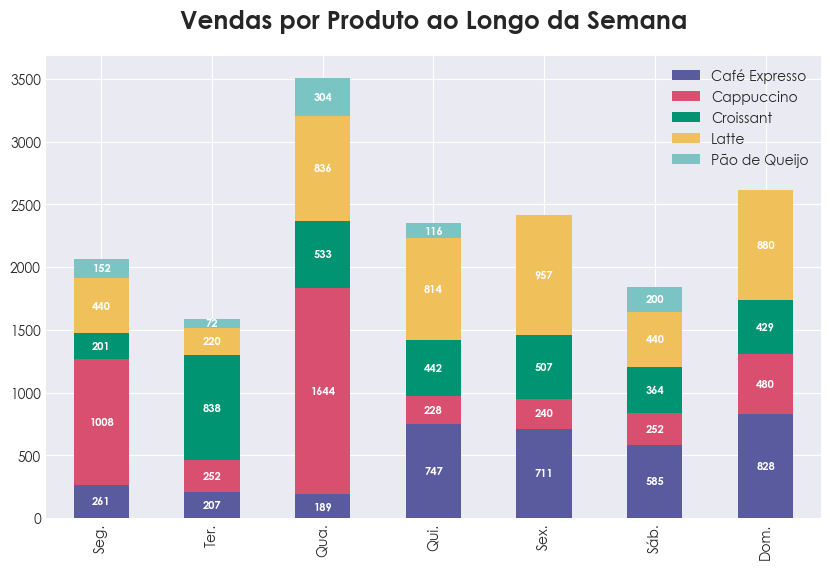

In [296]:
# Plotar o gráfico de barras empilhadas
ax = vendas_produto_por_dia.plot(kind="bar", stacked=True, figsize=(10, 6))

adiciona_valores_ao_grafico_barras_empilhadas(ax, vendas_produto_por_dia)

plt.title("Vendas por Produto ao Longo da Semana")
plt.xlabel("")
plt.legend(title="")
plt.show()


# Etapa 4 – Geração da narrativa
Objetivo: Comunicar os achados de forma clara e estratégica
1. Escreva uma “mini-história” com base nas observações dos gráficos.
2. Destaque quais dias são mais estratégicos e quais produtos são campeões de venda.
3. Sugira duas ações de marketing baseadas nesses padrões.


Observando as vendas diárias dos produtos ao longo do tempo podemos tirar algumas conclusões:

 Nosso produto mais vendido é o Latte juntamente com o Cappucino, que juntos compoem mais de 53% das vendas totais

- O dia de maiores vendas da semana é quarta feira, tendo como principal produto disparado o Cappucino.

- O produto menos vendido é pão de queijo, aonde na análise de histórico comporam somente 5% das vendas totais (844 vendas, não sendo vendido em nenhum dia de sexta ou de domingo). Croissant, seu concorrente direto não tem esse problema (compõe 20% das vendas totais)

- Uma estratégia de marketing interessante é fazermos promoções:
  - Quarta: Pão de queijo/Croissant + Cappucino/Latte
  - Domingo: Croissant + Latte/Expresso
  Essas promoções são interessantes pois atacam os produtos mais vendidos do dia, podendo impulsionar ainda mais as vendas. Nos dias de quarta o pão de queijo se apresenta como uma boa alternativa ao croissant, para o cliente. 

- Promoções de pão de queijo não são viáveis nos dias de sexta e de domingo

  

# Mini-Relatório
1. Dias mais lucrativos e suas causas:
    Os dias mais lucrativos são quarta-feira e domingo. Uma justificativa plausível é que quarta é um dia aonde muitos trabalhadores trabalham presencialmente, e consequentemente consomem mais café. Aos dias de domingo é mais esperado, finais de semana aonde as pessoas tem tempo livre, e o consumo é consequência.

2. Produtos com melhor desempenho:
    O produto de maior desemepenho é o Latte seguido pelo Cappucino

3. Observações visuais relevantes:
    - Quarta é o dia mais lucrativo da semana
    - Cappucino compõe quase 50% das vendas de Quarta, aonde é justamente seu pico de vendas semanal.
    - Latte é o produto mais vendido, e é bem consistente em sua distribuição de vendas pela semana (baixa variância), diferente do cappucino, por exemplo.

4. Sugestões de ação:
    - Implementar ações de marketing principalmente as quartas e domingo
    - Reconsiderar a venda de pães de queijo, que apresenta um baixissimo desempenho

5. Aprendizados sobre storytelling com dados:
    - A visualização de dados ajuda muito na análise, e também na hora de comunicar os dados de uma base. É indispensável para quem tem interesse em administrar um negócio de maneira consciente e eficiente. Uma ótima maneira de não operar "no escuro", você tem mais consciência do que está fazendo
